<a href="https://colab.research.google.com/github/devendrasinghr284/NLP_Customer_Dispute_Prediction/blob/main/AB_testing_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A/B Testing complete end to end project notebook with code and explaination

The below code notebook cover how to choose and characterize metrics to evaluate your experiments, how to design an experiment with enough statistical power and how to analyze the results and draw valid conclusions.



Experiment Name: "Free Trial" Screener.
It is conducted by Udacity, a website dedicated to teaching online - with the overall business goal of maximizing course completion by students.

2.1 Current Conditions Before Change
At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials".
If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first.
If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.
2.2 Description of Experimented Change
In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course.
If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free.
At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.
2.3 Experiment Hypothesis
The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

2.4 Experiment Details
The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.



**3 Metric Choice**
We need two types of metrics for a successful experiment (or at least, a safe one); Invariate and evaluation metrics. Invariate metrics are used for "sanity checks", that is, to make sure our experiment (the way we presented a change to a part of the population, as well as the way we collected the data) is not inherently wrong. Basically, this means we pick metrics which we consider not to change (not to be affected) because of our experiment and later make sure these metrics don't change drastically between our control and experiment groups.
Evaluation metrics on the other hand, are the metrics in which we expect to see a change, and are relevant to the business goals we aim to achieve. For each metric we state a  Dmin
  - which marks the minimum change which is practically significant to the business. For instance, stating that any increase in retention that is under 2%, even if statistically significant, is not practical to the business.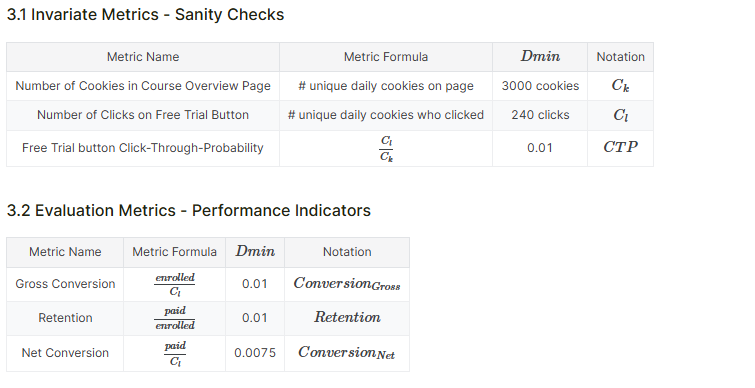


**4 Estimating the baseline values of metrics**

Before we start our experiment we should know how these metrics behave before the change - that is, what are their baseline values.




4.1 Collecting estimators data

Udacity gives the following rough estimates for these metrics (presumably collected from aggregates on daily traffic)

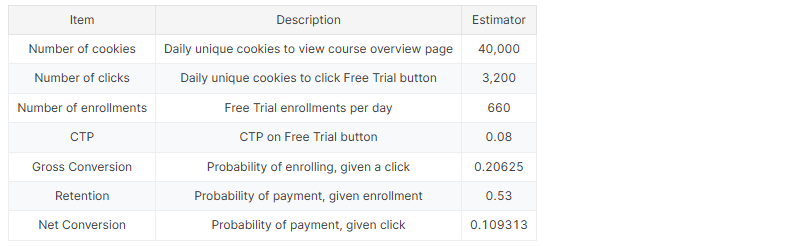

In [ ]:
import math as mt
import numpy as np
import pandas as pd
from scipy.stats import norm

In [5]:
Coontrol_df = pd.read_csv(r"/content/control_data.csv")

In [6]:
#Let's place this estimators into a dictionary for ease of use later
baseline = {"Cookies":40000,"Clicks":3200,"Enrollments":660,"CTP":0.08,"GConversion":0.20625,
           "Retention":0.53,"NConversion":0.109313}

**4.2 Estimating Standard Deviation**
Once we collected these estimates, we should estimate the standard deviation of a metric, this is computed for sample size calculations and confidence intervals for our results. The more variant a metric is, the harder it is to reach a significant result. Assuming a sample size of 5,000 cookies visiting the course overview page per day (as given in project's instructions) - we want to estimate a standard deviation, for the evaluation metrics only. The sample size we are considering should be smaller than the "population" we collected and small enough to have two groups with that size.


**4.2.1 Scaling Collected Data**


For all the calculations to follow we need to scale our collected counts estimates of metrics with the sample size we specified for variance estimation. In this case, from 40000 unique cookies to visit the course overview page per day, to 5000.



In [42]:
#Scale The counts estimates
baseline["Cookies"] = 5000
baseline["Clicks"]=baseline["Clicks"]*(5000/40000)
baseline["Enrollments"]=baseline["Enrollments"]*(5000/40000)
baseline

{'Cookies': 5000,
 'Clicks': 50.0,
 'Enrollments': 10.3125,
 'CTP': 0.08,
 'GConversion': 0.20625,
 'Retention': 0.53,
 'NConversion': 0.109313}

**4.2.2 Estimating Analytically **

In order to estimate variance analytically, we can assume metrics which are probabilities ( p^ ) are binomially distributed, so we can use this formula for the standard deviation:

 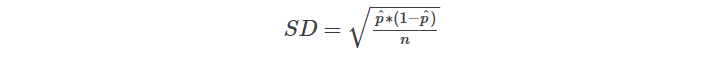

This assumption is only valid when the **unit of diversion** of the experiment is equal to the unit of analysis (the denominator of the metric formula). In the cases when this is not valid, the actual variance might be different and it is recommended to estimate it empirically.

For each metric, we need to plug two variables into the formula:

p - baseline probability of the event to occur

n - sample size

**Gross Conversion** - The baseline probability for Gross Conversion can be calculated by the number of users to enroll in a free trial divided by the number of cookies clicking the free trial. In other words, the probability of enrollment given a click. In this case, the unit of diversion (Cookies), that is the element by which we differentiate samples and assign them to control and experiment groups, is equall to the unit of analysis (cookies who click), that is the denominator of the formula to calculate Gross Conversion (GC). When this is the case, this analytic estimate of variance is sufficient.

In [9]:
# Let's get the p and n we need for Gross Conversion (GC)
# and compute the Stansard Deviation(sd) rounded to 4 decimal digits.
GC={}
GC["d_min"]=0.01
GC["p"]=baseline["GConversion"]
#p is given in this case - or we could calculate it from enrollments/clicks
GC["n"]=baseline["Clicks"]
GC["sd"]=round(mt.sqrt((GC["p"]*(1-GC["p"]))/GC["n"]),4)
GC["sd"]

0.0202

**Retention** - The baseline probability for retention is the number of paying users (enrolled after 14 free days) divided by the number of total enrolled users. In other words, the probability of payment, given enrollment. The sample size is the number of enrolled users. In this case, unit of diversion is not equal to unit of analysis (users who enrolled) so an analytical estimation is not enough - if we had the data for these estimates, we would want to estimate this variance empirically as well.

In [10]:
# Let's get the p and n we need for Retention(R)
# and compute the Stansard Deviation(sd) rounded to 4 decimal digits.
R={}
R["d_min"]=0.01
R["p"]=baseline["Retention"]
R["n"]=baseline["Enrollments"]
R["sd"]=round(mt.sqrt((R["p"]*(1-R["p"]))/R["n"]),4)
R["sd"]

0.0549

**Net Conversion** - The baseline probability for the net conversion is the number of paying users divided by the number of cookies that clicked the free trial button. In other words, the probability of payment, given a click. The sample size is the number of cookies that clicked. In this case, the unit of analysis and diversion are equal so we expect a good enough estimation analytically.

In [11]:
# Let's get the p and n we need for Net Conversion (NC)
# and compute the Standard Deviation (sd) rounded to 4 decimal digits.
NC={}
NC["d_min"]=0.0075
NC["p"]=baseline["NConversion"]
NC["n"]=baseline["Clicks"]
NC["sd"]=round(mt.sqrt((NC["p"]*(1-NC["p"]))/NC["n"]),4)
NC["sd"]

0.0156

**5 Experiment Sizing **
At this point, once we have estimated our metrics in the baseline (most
importantly, their estimated variance) we cancalculate the munumal number of samples we need so that our experiment will have enough statistical power, as well as siginificance.


In [12]:
def get_sds(p,d):
    sd1=mt.sqrt(2*p*(1-p))
    sd2=mt.sqrt(p*(1-p)+(p+d)*(1-(p+d)))
    x=[sd1,sd2]
    return x

In [13]:
#Inputs: required alpha value (alpha should already fit the required test)
#Returns: z-score for given alpha
def get_z_score(alpha):
    return norm.ppf(alpha)

# Inputs p-baseline conversion rate which is our estimated p and d-minimum detectable change
# Returns
def get_sds(p,d):
    sd1=mt.sqrt(2*p*(1-p))
    sd2=mt.sqrt(p*(1-p)+(p+d)*(1-(p+d)))
    sds=[sd1,sd2]
    return sds

# Inputs:sd1-sd for the baseline,sd2-sd for the expected change,alpha,beta,d-d_min,p-baseline estimate p
# Returns: the minimum sample size required per group according to metric denominator
def get_sampSize(sds,alpha,beta,d):
    n=pow((get_z_score(1-alpha/2)*sds[0]+get_z_score(1-beta)*sds[1]),2)/pow(d,2)
    return n

In [14]:
GC["d"]=0.01
R["d"]=0.01
NC["d"]=0.0075

In [15]:
# Let's get an integer value for simplicity
GC["SampSize"]=round(get_sampSize(get_sds(GC["p"],GC["d"]),0.05,0.2,GC["d"]))
GC["SampSize"]

25835

In [17]:
GC["SampSize"]=round(GC["SampSize"]/0.08*2)
GC["SampSize"]

645875

In [18]:
# Getting a nice integer value
R["SampSize"]=round(get_sampSize(get_sds(R["p"],R["d"]),0.05,0.2,R["d"]))
R["SampSize"]

39087

In [19]:
R["SampSize"]=R["SampSize"]/0.08/0.20625*2
R["SampSize"]

4737818.181818182

In [20]:
# Getting a nice integer value
NC["SampSize"]=round(get_sampSize(get_sds(NC["p"],NC["d"]),0.05,0.2,NC["d"]))
NC["SampSize"]

27413

In [21]:
NC["SampSize"]=NC["SampSize"]/0.08*2
NC["SampSize"]

685325.0

In [ ]:
# we use pandas to load datasets



In [23]:
control = Coontrol_df

In [24]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [25]:
experiment=pd.read_csv(r"/content/experiment_data.csv")


In [27]:
pageviews_cont=control['Pageviews'].sum()
pageviews_exp=experiment['Pageviews'].sum()
pageviews_total=pageviews_cont+pageviews_exp
print ("number of pageviews in control:", pageviews_cont)
print ("number of Pageviewsin experiment:" ,pageviews_exp)

number of pageviews in control: 345543
number of Pageviewsin experiment: 344660


In [28]:
p=0.5
alpha=0.05
p_hat=round(pageviews_cont/(pageviews_total),4)
sd=mt.sqrt(p*(1-p)/(pageviews_total))
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4988 and 0.5012 ; Is 0.5006 inside this range?


In [29]:
clicks_cont=control['Clicks'].sum()
clicks_exp=experiment['Clicks'].sum()
clicks_total=clicks_cont+clicks_exp

p_hat=round(clicks_cont/clicks_total,4)
sd=mt.sqrt(p*(1-p)/clicks_total)
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4959 and 0.5041 ; Is 0.5005 inside this range?


In [30]:
ctp_cont=clicks_cont/pageviews_cont
ctp_exp=clicks_exp/pageviews_exp
d_hat=round(ctp_exp-ctp_cont,4)
p_pooled=clicks_total/pageviews_total
sd_pooled=mt.sqrt(p_pooled*(1-p_pooled)*(1/pageviews_cont+1/pageviews_exp))
ME=round(get_z_score(1-(alpha/2))*sd_pooled,4)
print ("The confidence interval is between",0-ME,"and",0+ME,"; Is",d_hat,"within this range?")

The confidence interval is between -0.0013 and 0.0013 ; Is 0.0001 within this range?


In [32]:
# Count the total clicks from complete records only
clicks_cont=control["Clicks"].loc[control["Enrollments"].notnull()].sum()
clicks_exp=experiment["Clicks"].loc[experiment["Enrollments"].notnull()].sum()

In [33]:
#Gross Conversion - number of enrollments divided by number of clicks
enrollments_cont=control["Enrollments"].sum()
enrollments_exp=experiment["Enrollments"].sum()

GC_cont=enrollments_cont/clicks_cont
GC_exp=enrollments_exp/clicks_exp
GC_pooled=(enrollments_cont+enrollments_exp)/(clicks_cont+clicks_exp)
GC_sd_pooled=mt.sqrt(GC_pooled*(1-GC_pooled)*(1/clicks_cont+1/clicks_exp))
GC_ME=round(get_z_score(1-alpha/2)*GC_sd_pooled,4)
GC_diff=round(GC_exp-GC_cont,4)
print("The change due to the experiment is",GC_diff*100,"%")
print("Confidence Interval: [",GC_diff-GC_ME,",",GC_diff+GC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",-GC["d_min"],"is not in the CI as well.")

The change due to the experiment is -2.06 %
Confidence Interval: [ -0.0292 , -0.012 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if -0.01 is not in the CI as well.


In [34]:
#Net Conversion - number of payments divided by number of clicks
payments_cont=control["Payments"].sum()
payments_exp=experiment["Payments"].sum()

NC_cont=payments_cont/clicks_cont
NC_exp=payments_exp/clicks_exp
NC_pooled=(payments_cont+payments_exp)/(clicks_cont+clicks_exp)
NC_sd_pooled=mt.sqrt(NC_pooled*(1-NC_pooled)*(1/clicks_cont+1/clicks_exp))
NC_ME=round(get_z_score(1-alpha/2)*NC_sd_pooled,4)
NC_diff=round(NC_exp-NC_cont,4)
print("The change due to the experiment is",NC_diff*100,"%")
print("Confidence Interval: [",NC_diff-NC_ME,",",NC_diff+NC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",NC["d_min"],"is not in the CI as well.")

The change due to the experiment is -0.49 %
Confidence Interval: [ -0.0116 , 0.0018000000000000004 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if 0.0075 is not in the CI as well.


In [35]:
#let's first create the dataset we need for this:
# start by merging the two datasets
full=control.join(other=experiment,how="inner",lsuffix="_cont",rsuffix="_exp")
#Let's look at what we got
full.count()

,0
Date_cont,37
Pageviews_cont,37
Clicks_cont,37
Enrollments_cont,23
Payments_cont,23
Date_exp,37
Pageviews_exp,37
Clicks_exp,37
Enrollments_exp,23
Payments_exp,23


In [36]:
#now we only need the complete data records
full=full.loc[full["Enrollments_cont"].notnull()]
full.count()

,0
Date_cont,23
Pageviews_cont,23
Clicks_cont,23
Enrollments_cont,23
Payments_cont,23
Date_exp,23
Pageviews_exp,23
Clicks_exp,23
Enrollments_exp,23
Payments_exp,23


In [37]:
# Perfect! Now, derive a new column for each metric, so we have it's daily values
# We need a 1 if the experiment value is greater than the control value=
x=full['Enrollments_cont']/full['Clicks_cont']
y=full['Enrollments_exp']/full['Clicks_exp']
full['GC'] = np.where(x<y,1,0)
# The same now for net conversion
z=full['Payments_cont']/full['Clicks_cont']
w=full['Payments_exp']/full['Clicks_exp']
full['NC'] = np.where(z<w,1,0)
full.head()

,Date_cont,Pageviews_cont,Clicks_cont,Enrollments_cont,Payments_cont,Date_exp,Pageviews_exp,Clicks_exp,Enrollments_exp,Payments_exp,GC,NC
0,"Sat, Oct 11",7723,687,134.0,70.0,"Sat, Oct 11",7716,686,105.0,34.0,0,0
1,"Sun, Oct 12",9102,779,147.0,70.0,"Sun, Oct 12",9288,785,116.0,91.0,0,1
2,"Mon, Oct 13",10511,909,167.0,95.0,"Mon, Oct 13",10480,884,145.0,79.0,0,0
3,"Tue, Oct 14",9871,836,156.0,105.0,"Tue, Oct 14",9867,827,138.0,92.0,0,0
4,"Wed, Oct 15",10014,837,163.0,64.0,"Wed, Oct 15",9793,832,140.0,94.0,0,1


In [38]:
GC_x=full.GC[full["GC"]==1].count()
NC_x=full.NC[full["NC"]==1].count()
n=full.NC.count()
print("No. of cases for GC:",GC_x,'\n',
      "No. of cases for NC:",NC_x,'\n',
      "No. of total cases",n)

No. of cases for GC: 4 
 No. of cases for NC: 10 
 No. of total cases 23


In [39]:
#first a function for calculating probability of x=number of successes
def get_prob(x,n):
    p=round(mt.factorial(n)/(mt.factorial(x)*mt.factorial(n-x))*0.5**x*0.5**(n-x),4)
    return p
#next a function to compute the pvalue from probabilities of maximum x
def get_2side_pvalue(x,n):
    p=0
    for i in range(0,x+1):
        p=p+get_prob(i,n)
    return 2*p

In [40]:
print ("GC Change is significant if",get_2side_pvalue(GC_x,n),"is smaller than 0.05")
print ("NC Change is significant if",get_2side_pvalue(NC_x,n),"is smaller than 0.05")

GC Change is significant if 0.0026000000000000003 is smaller than 0.05
NC Change is significant if 0.6774 is smaller than 0.05


In [41]:
# the final conclusion based on the above output
'''
We get the same conclusions as we got from our effect size calculation: the change in Gross conversion was indeed significant,
while the change in Net conversion was not.

